In [2]:
!pip3 install pyclustering

     |████████████████████████████████| 2.6MB 6.1MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp36-none-any.whl size=2395105 sha256=3bcf1c7fb7a7af8942bce915d4ad23fde3907961d0e8458ad91e8666c5c626f4
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.nnet.som import som, type_conn, type_init, som_parameters
import math
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
customers = pd.read_csv('/content/drive/MyDrive/DM/Clustering/customer_indicators_dbscan.csv', sep=',', index_col=0)
del customers['cluster']
customers.head()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean
0,0.364140,0.147436,0.621610,0.330837,0.373304,0.175731
1,0.028548,0.134615,0.579380,0.059851,0.000000,0.002963
3,0.040049,1.000000,0.000000,0.255570,0.000000,0.073371
4,0.107825,0.099359,0.544568,0.097173,0.621610,0.130666
5,0.003902,1.000000,0.000000,0.024902,0.000000,0.070437


In [22]:
customers.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean
count,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000
mean,0.092378,0.515596,0.260383,0.183406,0.282317,0.167236
std,0.115191,0.411099,0.319440,0.136662,0.336345,0.131103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020743,0.128205,0.000000,0.085845,0.000000,0.071157
50%,0.050421,0.326923,0.000000,0.150639,0.000000,0.135807
75%,0.116656,1.000000,0.579380,0.248717,0.612602,0.233337
max,0.986239,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
np_customer = customers.to_numpy();

##Model setting

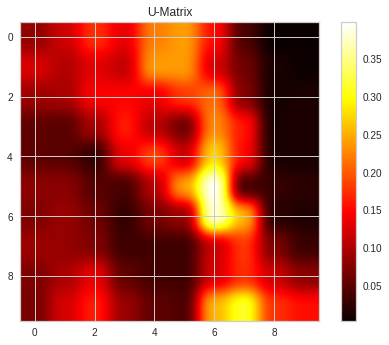

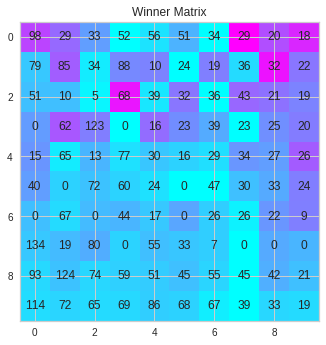

winning neurons: 89


In [25]:
sample = np_customer
 
# create SOM parameters
parameters = som_parameters()
 
# create self-organized feature map with size 7x7
rows = round(math.sqrt(5*math.sqrt(len(customers))))  # five rows
cols = round(math.sqrt(5*math.sqrt(len(customers))))  # five columns

structure = type_conn.grid_four;  # each neuron has max. four neighbors.
network = som(rows, cols, structure, parameters)
 
# train network on 'Lsun' sample during 100 epouchs.
network.train(sample, 10) 
 
# result visualization:
# show distance matrix (U-matrix).
network.show_distance_matrix()
 
# show density matrix (P-matrix).
network.show_density_matrix()
 
# show winner matrix.
network.show_winner_matrix()

print('winning neurons: ' + str(network.get_winner_number()))

In [26]:
kmeams_input = []
for customer in np_customer:
  cluster = network.simulate(customer)
  kmeams_input.append(network.weights[cluster])
kmeams_input = np.array(kmeams_input)

### Parameter setting

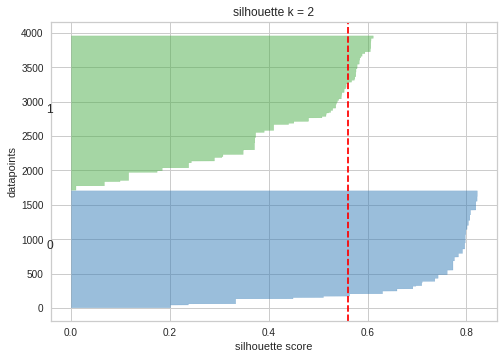

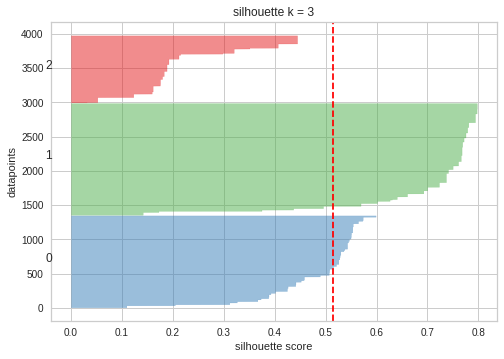

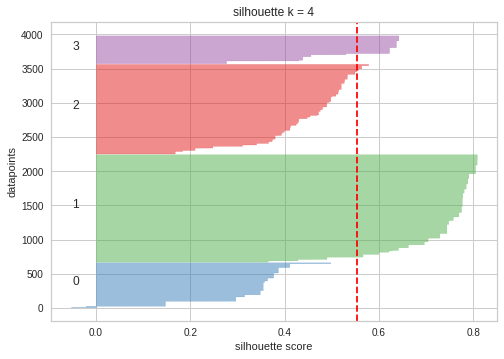

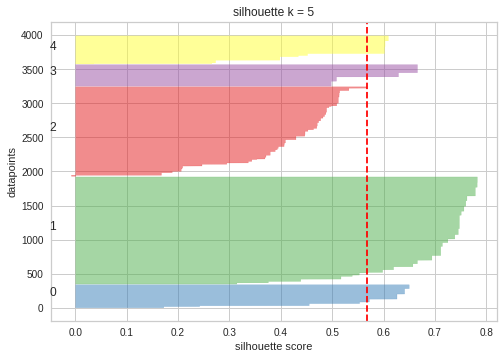

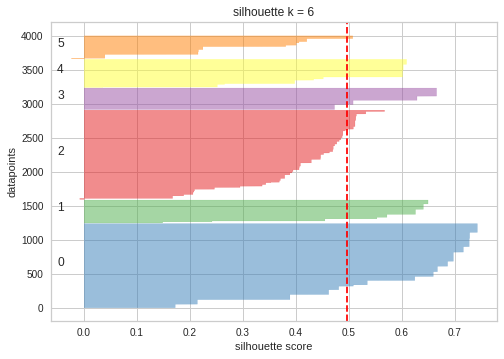

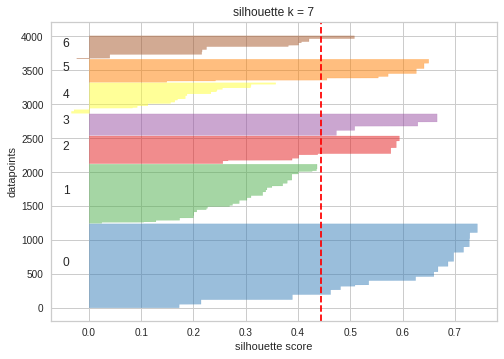

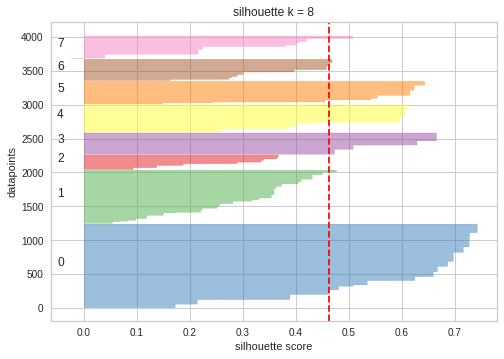

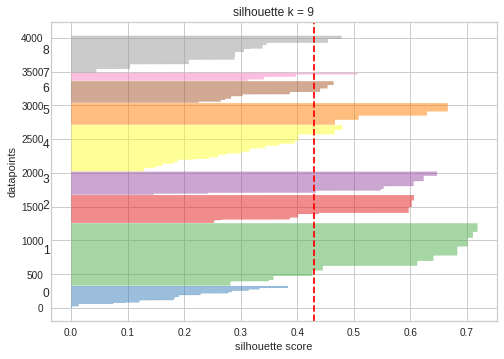

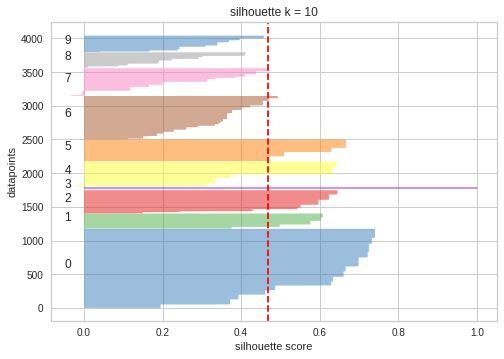

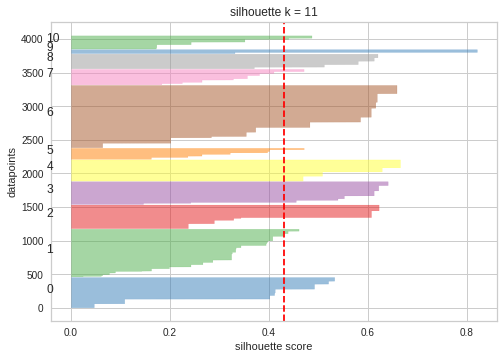

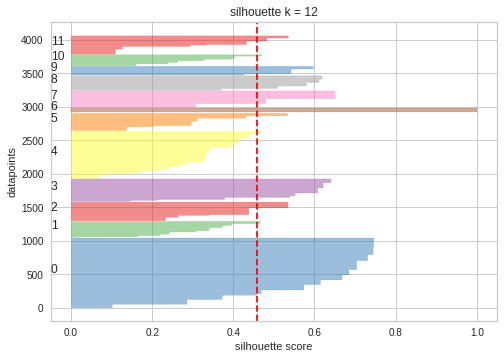

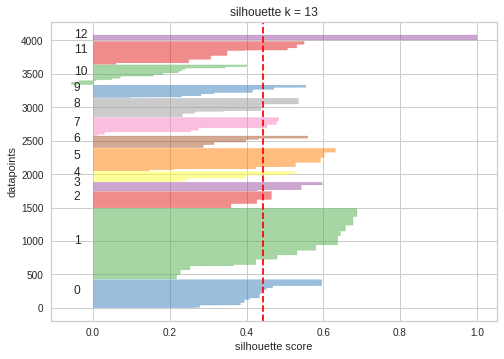

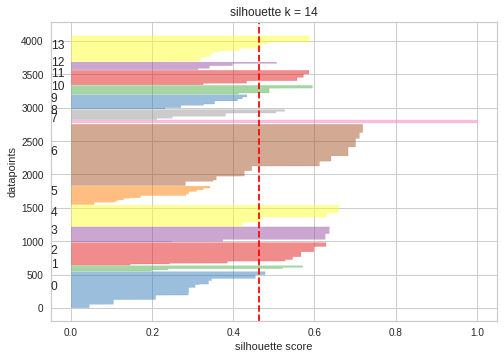

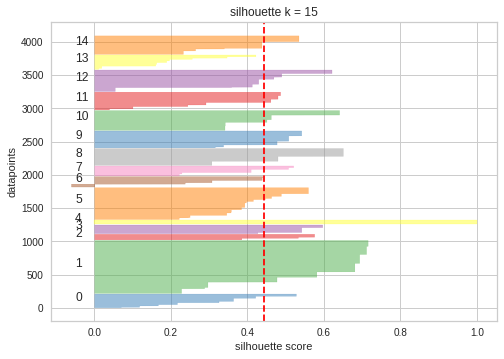

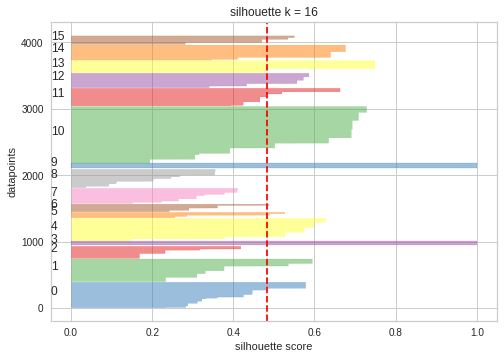

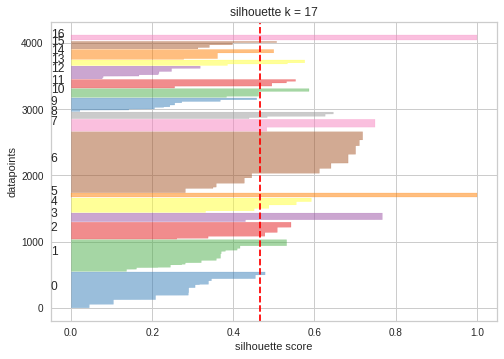

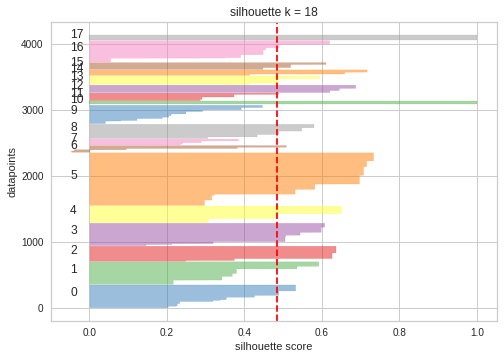

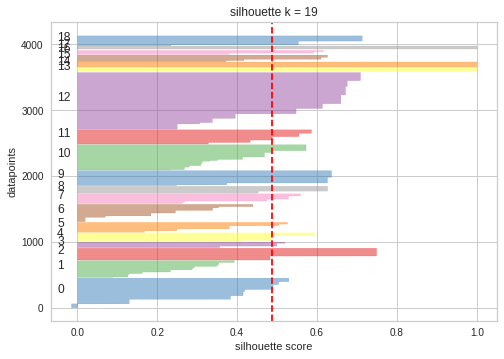

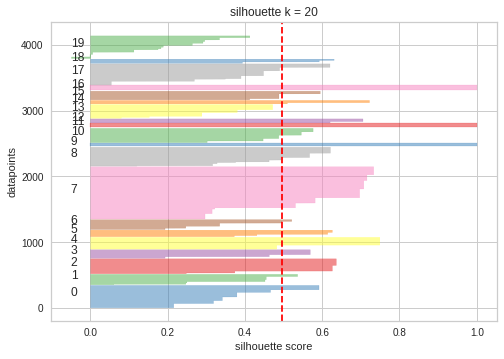

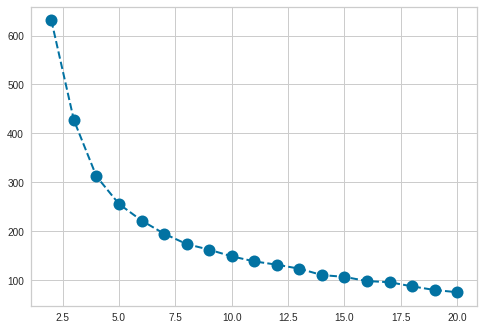

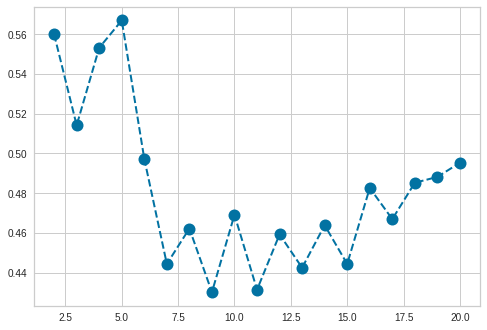

In [27]:
MAX_K_VALUE = 20
silhouette_scores = []
sse = []

for i in range(2, MAX_K_VALUE + 1):
    fig = plt.figure()
    km = KMeans(n_clusters=i, n_init=20, max_iter=200)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(kmeams_input)
    sse.append(km.inertia_)
    silhouette_avg = silhouette_score(kmeams_input, km.labels_)
    silhouette_scores.append(silhouette_avg)
    plt.title('silhouette k = ' + str(i))
    visualizer.ax.set_xlabel("silhouette score")
    visualizer.ax.set_ylabel("datapoints")
    #plt.show()

plt.show()
plt.plot([el for el in range(2, MAX_K_VALUE + 1)], sse, 'o--', linewidth=2, markersize=12)
plt.savefig('./sse.png')
#plt.savefig('/content/drive/MyDrive/DM/Clustering/SOM/sse.png')
plt.show()
plt.plot([el for el in range(2, MAX_K_VALUE + 1)], silhouette_scores, 'o--', linewidth=2, markersize=12)
plt.savefig('./silhouette_scores.png')
#plt.savefig('/content/drive/MyDrive/DM/Clustering/SOM/silhouette_scores.png')
plt.show()

##Cluster analysis

In [13]:
km = KMeans(n_clusters=5, n_init=20, max_iter=200)
labels = km.fit_predict(kmeams_input)
customers_c = customers.copy()
customers_c["label"] = labels

In [14]:
customers_0 = customers_c[customers_c["label"] == 0]
customers_1 = customers_c[customers_c["label"] == 1]
customers_2 = customers_c[customers_c["label"] == 2]
customers_3 = customers_c[customers_c["label"] == 3]
customers_4 = customers_c[customers_c["label"] == 4]

[Text(0, 0, 'TotalProducts'),
 Text(0, 0, 'distance_in_time_purchase'),
 Text(0, 0, 'Qta_entropy'),
 Text(0, 0, 'Qta_mean'),
 Text(0, 0, 'Sale_entropy'),
 Text(0, 0, 'Sale_mean'),
 Text(0, 0, 'label')]

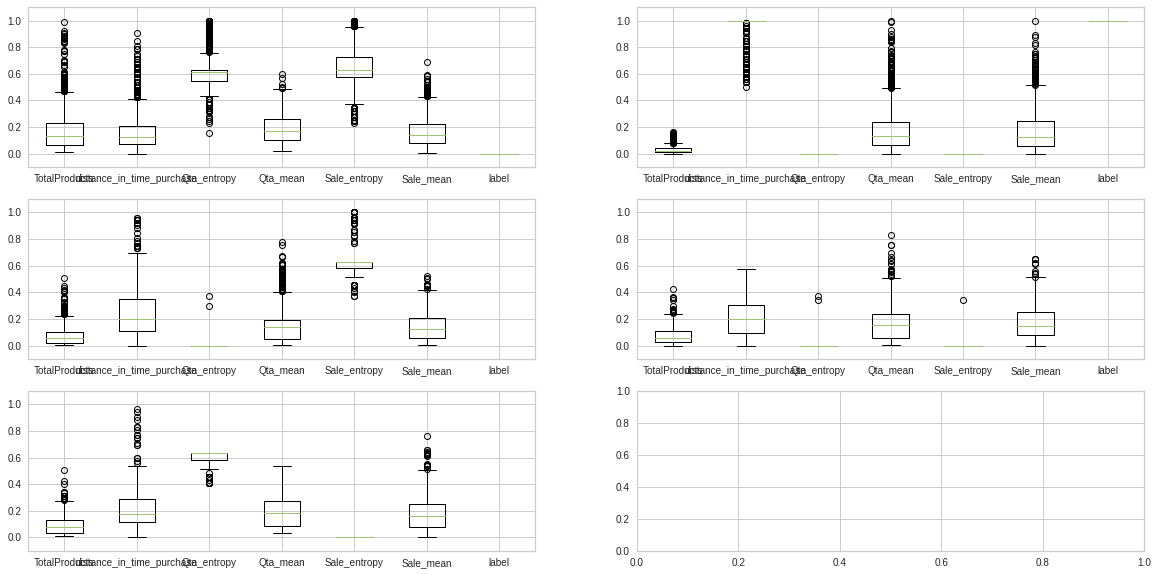

In [15]:
fig, ax = plt.subplots(3,2,figsize=(20, 10))
label_names = customers_1.columns

ax[0][0].boxplot(customers_0.to_numpy())
ax[0][0].set_ylim(-0.1,1.1)
ax[0][0].set_xticklabels(label_names)

ax[0][1].boxplot(customers_1.to_numpy())
ax[0][1].set_ylim(-0.1,1.1)
ax[0][1].set_xticklabels(label_names)

ax[1][0].boxplot(customers_2.to_numpy())
ax[1][0].set_ylim(-0.1,1.1)
ax[1][0].set_xticklabels(label_names)

ax[1][1].boxplot(customers_3.to_numpy())
ax[1][1].set_ylim(-0.1,1.1)
ax[1][1].set_xticklabels(label_names)

ax[2][0].boxplot(customers_4.to_numpy())
ax[2][0].set_ylim(-0.1,1.1)
ax[2][0].set_xticklabels(label_names)

print()

In [16]:
from sklearn.decomposition import PCA
np_customer = customers.to_numpy();
indicators = customers.copy()

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


X_pca = PCA(n_components=3).fit_transform(customers)

x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]

fig = px.scatter_3d(X_pca, x=x, y=y, z=z,color=labels)
fig.update_traces(marker=dict(size=4))

fig.show()